In [41]:
import numpy as np
import math
import matplotlib.pyplot as plt
import decimal
from decimal import *
import sys
import statistics 
from matplotlib.lines import Line2D

%matplotlib inline
plt.style.use('seaborn')

In [42]:
def generate_samples(n_samples, n_features, seed, train_w_init , test = False):
    np.random.seed(seed)
    x = np.zeros(shape=(n_samples,n_features+1))
    y_true = []
    w_rand = None
    
    #generate random datapoints
    x_rand = np.random.uniform( -1, +1, size = (n_samples,n_features))
    
    if(test == False):
        w_rand = np.random.uniform( -100, +100, size = (n_features+1,))
        for i in range(0,n_samples):
            x[i] = [1] + [x_rand[i][j] for j in range(n_features)]
        
        #generate the y labels
        for i in range(len(x)):
            wTx_target = w_rand.dot(x[i].transpose())
            y_true.append(np.sign(wTx_target))
    else:
        for i in range(0,n_samples):
            x[i] = [1] + [x_rand[i][j] for j in range(n_features)]
        
        #generate the y labels
        for i in range(len(x)):
            wTx_target = train_w_init.dot(x[i].transpose())
            y_true.append(np.sign(wTx_target))
        
    return x, y_true, w_rand

In [43]:
def plot_dataset(x, y_true):
    
    for i in range(len(x)):
        
        #plot the data points on a scatter plot
        if(y_true[i] >= 0):
            ax.scatter(x[i][1],x[i][2], color = 'dodgerblue')
        else:   
            ax.scatter(x[i][1], x[i][2], color = 'brown') 
    
    return ax

In [44]:
def target_function(n_samples, ax, x, y_true, w_init):

    x_vals = np.array(ax.get_xlim())
        
    #compute the slope and intercept of the target function 
    target_slope = -w_init[1]/w_init[2]
    target_intercept = -w_init[0]/w_init[2]
    
    target_line = x_vals * target_slope + target_intercept
    
    #plot the target function
    ax.plot(x_vals,target_line, color = 'k', label = 'Target Function, f')
    
    return ax, x_vals

In [45]:
def cal_classification_error(x, y, w):
    misclassified_pts = []
    
    #Evaluate whether the data points are classified based on the computed weights
    for i in range(len(x)):
        wTx = w.dot(x[i].transpose())
        if wTx > sys.maxsize or wTx < -sys.maxsize:
            wTx = sys.maxsize - 1 if wTx > 0 else -sys.maxsize + 1

        if np.sign(wTx) != y[i]:
            misclassified_pts.append(i)
    
    #append the misclassified arrays for x and y
    new_x = [x[j] for j in misclassified_pts]
    new_y = [y[j] for j in misclassified_pts]
    
    #compute the error rate based on the number of misclassified points
    misclassfied_error = (len(misclassified_pts)/len(x))*100
            
    return len(misclassified_pts), misclassfied_error, new_x, new_y

In [46]:
def perceptron(x, y, hard_stop, eta):
    w = np.array([0,0,0])
    iterations = 0
    train_x = x
    train_y = y
    acc = None

    wtx = []
    while iterations < hard_stop:
        #pick a point at random and compute its s = wTx.
        idx = np.random.randint(0,len(train_x))
        
        s = w.dot(train_x[idx].transpose())
        
        if s > sys.maxsize or s < -sys.maxsize:
            s = sys.maxsize - 1 if s > 0 else -sys.maxsize + 1

        wtx.append(s)
        
        #check for the signs, if doesn't match, update the weight
        if train_y[idx]*s <= 1:
            w = w + eta * ((train_y[idx] - s) * train_x[idx])
            
        #calculate the new training data set(the misclassified points become the new training dataset).
        misclassified_pts, misclassfied_error, train_x, train_y = cal_classification_error(x,y,w)
        
        if misclassified_pts == 0:
            break   
        
        iterations += 1
        
    return w, iterations, misclassfied_error, misclassified_pts, wtx          

In [47]:
def plot_boundary(w, ax, points,error):    
    
    legend_elements = [Line2D([0],[0], color='black', lw=2, label='Target Function, f'),
                       Line2D([0],[0], color='red', lw=2, label='Final Hypothesis, g'),
                       Line2D([0], [0], marker='o', color='dodgerblue', label='y = +1',markersize=7),
                       Line2D([0], [0], marker='o', color='brown', label='y = -1',markersize=7)]
    
    #compute the slope and intercept for the final hypothesis
    final_slope = -1*(w[1]/w[2])  
    final_intercept = -1*(w[0]/w[2])
    
    #compute the final hypothesis
    y_pred = points * final_slope + final_intercept
    
    #plot the final hypothesis
    ax.plot(points,y_pred,color = 'r', Label = 'Final Hypothesis, g')
    ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1.25, 0.75), fontsize=10.5)

#### 1.4.a) 
#### Generate train dataset of size 100 and test data of size 10000.
#### Learning rate is eta to 100.
#### Maximum iterations that can be reached is 1000.

Learning rate, η = 100
-------------------
Adaline PLA - Training:
Training sample = 100
Total number of updates before the algorithm converged during training: 69
Number of misclassified points on the training dataset= 0
Error rate on the train dataset= 0.00 %
-----------------------------------------------------------------------------------
Adaline PLA - Testing:
Testing sample = 10000
Number of misclassified points on the testing dataset= 114
Error rate on the test dataset= 1.14 %


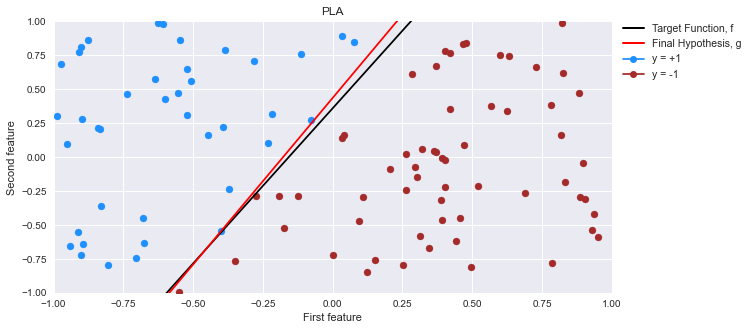

In [48]:
training_sample = 100
testing_sample = 10000
n_features = 2
seed = 101
eta = 100

fig, ax = plt.subplots(figsize=(10,5))

#create the train dataset
train_x, train_y, train_w_init = generate_samples(training_sample, n_features, seed, None,test = False)
ax  = plot_dataset(train_x, train_y)

#create the test dataset
test_x, test_y, test_w_init = generate_samples(testing_sample, n_features, seed, train_w_init, test = True)

#Plot the target function
ax, points = target_function(training_sample, ax, train_x, train_y, train_w_init)

#Set the plot parameters
plt.title("PLA")
plt.xlabel("First feature")
plt.ylabel("Second feature")
ax.set_xlim(-1,+1)
ax.set_ylim(-1,+1)


#Train the training sample
updated_w, iterations, train_error, train_misclassified_pts, s = perceptron(train_x, train_y, 1000, eta)
plot_boundary(updated_w, ax, points, train_error)

print("Learning rate, \u03B7 = {}".format(eta))
print("-------------------")
print("Adaline PLA - Training:")
print("Training sample = {}".format(training_sample))
print("Total number of updates before the algorithm converged during training: {}".format(iterations))
print("Number of misclassified points on the training dataset= {}".format(train_misclassified_pts))
print("Error rate on the train dataset= {} %".format('%.2f'%(train_error)))
print("-----------------------------------------------------------------------------------")

#Compute the error for the test dataset with the updated weights
test_misclassified_pts, test_error, new_x, new_y = cal_classification_error(test_x, test_y, updated_w)

print("Adaline PLA - Testing:")
print("Testing sample = {}".format(testing_sample))
print("Number of misclassified points on the testing dataset= {}".format(test_misclassified_pts))
print("Error rate on the test dataset= {} %".format('%.2f'%(test_error)))

#### 1.4.b) 
#### Generate train dataset of size 100 and test data of size 10000.
#### Learning rate is eta to 1.
#### Maximum iterations that can be reached is 1000.

Learning rate, η = 1
-------------------
Adaline PLA - Training:
Training sample = 100
Total number of updates before the algorithm converged during training: 63
Number of misclassified points on the training dataset= 0
Error rate on the train dataset= 0.00 %
-----------------------------------------------------------------------------------
Adaline PLA - Testing:
Testing sample = 10000
Number of misclassified points on the testing dataset= 106
Error rate on the test dataset= 1.06 %


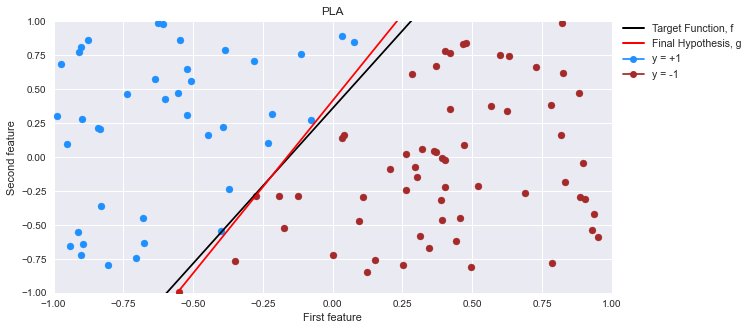

In [49]:
training_sample = 100
testing_sample = 10000
n_features = 2
seed = 101
eta = 1

fig, ax = plt.subplots(figsize=(10,5))

#create the train dataset
train_x, train_y, train_w_init = generate_samples(training_sample, n_features, seed, None,test = False)
ax  = plot_dataset(train_x, train_y)

#create the test dataset
test_x, test_y, test_w_init = generate_samples(testing_sample, n_features, seed, train_w_init, test = True)

#Plot the target function
ax, points = target_function(training_sample, ax, train_x, train_y, train_w_init)

#Set the plot parameters
plt.title("PLA")
plt.xlabel("First feature")
plt.ylabel("Second feature")
ax.set_xlim(-1,+1)
ax.set_ylim(-1,+1)


#Train the training sample
updated_w, iterations, train_error, train_misclassified_pts, s = perceptron(train_x, train_y, 1000, eta)
plot_boundary(updated_w, ax, points, train_error)

print("Learning rate, \u03B7 = {}".format(eta))
print("-------------------")
print("Adaline PLA - Training:")
print("Training sample = {}".format(training_sample))
print("Total number of updates before the algorithm converged during training: {}".format(iterations))
print("Number of misclassified points on the training dataset= {}".format(train_misclassified_pts))
print("Error rate on the train dataset= {} %".format('%.2f'%(train_error)))
print("-----------------------------------------------------------------------------------")

#Compute the error for the test dataset with the updated weights
test_misclassified_pts, test_error, new_x, new_y = cal_classification_error(test_x, test_y, updated_w)

print("Adaline PLA - Testing:")
print("Testing sample = {}".format(testing_sample))
print("Number of misclassified points on the testing dataset= {}".format(test_misclassified_pts))
print("Error rate on the test dataset= {} %".format('%.2f'%(test_error)))

#### 1.4.c) 
#### Generate train dataset of size 100 and test data of size 10000.
#### Learning rate is eta to 0.01.
#### Maximum iterations that can be reached is 1000.

Learning rate, η = 0.01
-------------------
Adaline PLA - Training:
Training sample = 100
Total number of updates before the algorithm converged during training: 50
Number of misclassified points on the training dataset= 0
Error rate on the train dataset= 0.00 %
-----------------------------------------------------------------------------------
Adaline PLA - Testing:
Testing sample = 10000
Number of misclassified points on the testing dataset= 138
Error rate on the test dataset= 1.38 %


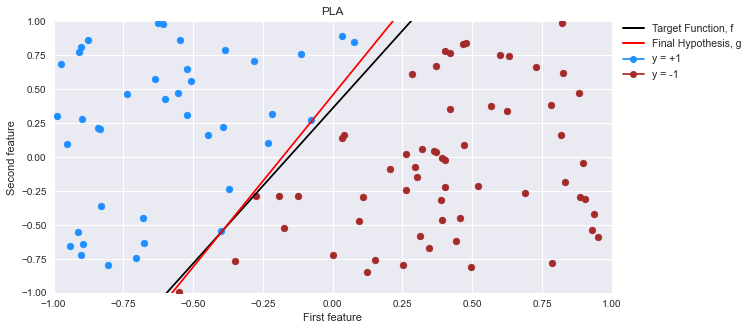

In [50]:
training_sample = 100
testing_sample = 10000
n_features = 2
seed = 101
eta = 0.01

fig, ax = plt.subplots(figsize=(10,5))

#create the train dataset
train_x, train_y, train_w_init = generate_samples(training_sample, n_features, seed, None,test = False)
ax  = plot_dataset(train_x, train_y)

#create the test dataset
test_x, test_y, test_w_init = generate_samples(testing_sample, n_features, seed, train_w_init, test = True)

#Plot the target function
ax, points = target_function(training_sample, ax, train_x, train_y, train_w_init)

#Set the plot parameters
plt.title("PLA")
plt.xlabel("First feature")
plt.ylabel("Second feature")
ax.set_xlim(-1,+1)
ax.set_ylim(-1,+1)


#Train the training sample
updated_w, iterations, train_error, train_misclassified_pts, s = perceptron(train_x, train_y, 1000, eta)
plot_boundary(updated_w, ax, points, train_error)

print("Learning rate, \u03B7 = {}".format(eta))
print("-------------------")
print("Adaline PLA - Training:")
print("Training sample = {}".format(training_sample))
print("Total number of updates before the algorithm converged during training: {}".format(iterations))
print("Number of misclassified points on the training dataset= {}".format(train_misclassified_pts))
print("Error rate on the train dataset= {} %".format('%.2f'%(train_error)))
print("-----------------------------------------------------------------------------------")

#Compute the error for the test dataset with the updated weights
test_misclassified_pts, test_error, new_x, new_y = cal_classification_error(test_x, test_y, updated_w)

print("Adaline PLA - Testing:")
print("Testing sample = {}".format(testing_sample))
print("Number of misclassified points on the testing dataset= {}".format(test_misclassified_pts))
print("Error rate on the test dataset= {} %".format('%.2f'%(test_error)))

#### 1.4.d) 
#### Generate train dataset of size 100 and test data of size 10000.
#### Learning rate is eta to 0.0001.
#### Maximum iterations that can be reached is 1000.

Learning rate, η = 0.0001
-------------------
Adaline PLA - Training:
Training sample = 100
Total number of updates before the algorithm converged during training: 42
Number of misclassified points on the training dataset= 0
Error rate on the train dataset= 0.00 %
-----------------------------------------------------------------------------------
Adaline PLA - Testing:
Testing sample = 10000
Number of misclassified points on the testing dataset= 124
Error rate on the test dataset= 1.24 %


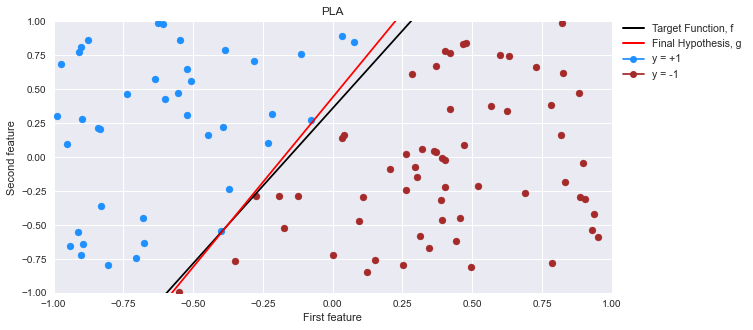

In [51]:
training_sample = 100
testing_sample = 10000
n_features = 2
seed = 101
eta = 0.0001

fig, ax = plt.subplots(figsize=(10,5))

#create the train dataset
train_x, train_y, train_w_init = generate_samples(training_sample, n_features, seed, None,test = False)
ax  = plot_dataset(train_x, train_y)

#create the test dataset
test_x, test_y, test_w_init = generate_samples(testing_sample, n_features, seed, train_w_init, test = True)

#Plot the target function
ax, points = target_function(training_sample, ax, train_x, train_y, train_w_init)

#Set the plot parameters
plt.title("PLA")
plt.xlabel("First feature")
plt.ylabel("Second feature")
ax.set_xlim(-1,+1)
ax.set_ylim(-1,+1)


#Train the training sample
updated_w, iterations, train_error, train_misclassified_pts, s = perceptron(train_x, train_y, 1000, eta)
plot_boundary(updated_w, ax, points, train_error)

print("Learning rate, \u03B7 = {}".format(eta))
print("-------------------")
print("Adaline PLA - Training:")
print("Training sample = {}".format(training_sample))
print("Total number of updates before the algorithm converged during training: {}".format(iterations))
print("Number of misclassified points on the training dataset= {}".format(train_misclassified_pts))
print("Error rate on the train dataset= {} %".format('%.2f'%(train_error)))
print("-----------------------------------------------------------------------------------")

#Compute the error for the test dataset with the updated weights
test_misclassified_pts, test_error, new_x, new_y = cal_classification_error(test_x, test_y, updated_w)

print("Adaline PLA - Testing:")
print("Testing sample = {}".format(testing_sample))
print("Number of misclassified points on the testing dataset= {}".format(test_misclassified_pts))
print("Error rate on the test dataset= {} %".format('%.2f'%(test_error)))

#### 1.4.e)
#### Compare the results of (a) to (d)

In [52]:
print("TEST SAMPLE  |  LEARNING RATE  |  ERROR %  |  # OF ITERATIONS FOR TRAIN DATASET TO CONVERGE")
print("  10000      |      100        |   1.14    |                   69")
print("  10000      |       1         |   1.06    |                   63")
print("  10000      |      0.01       |   1.38    |                   50")
print("  10000      |     0.0001      |   1.24    |                   42")
  

print("Clearly, \u03B7 of 1 resulted in the minimum classification error rate on the test dataset.")

TEST SAMPLE  |  LEARNING RATE  |  ERROR %  |  # OF ITERATIONS FOR TRAIN DATASET TO CONVERGE
  10000      |      100        |   1.14    |                   69
  10000      |       1         |   1.06    |                   63
  10000      |      0.01       |   1.38    |                   50
  10000      |     0.0001      |   1.24    |                   42
Clearly, η of 1 resulted in the minimum classification error rate on the test dataset.
